In [ ]:
# setup for google colab
! pip install ipykernel pandas librosa seaborn


!git clone https://www.github.com/dderiso/gdtw
!cd gdtw
# python setup.py install

!python setup.py build_ext --inplace
!pip install -e .

In [1]:
# last working with gdtw_test_20250529_2 (3.6), 
# as of 2025 05 30... py 3.6 doesn't allow for jupyter inline debugging, so I upgraded to py3.7
 

%reload_ext autoreload
%autoreload 2

import sys
package_path = "/usr2/collab/lbullock/Documents/python/Speech-Articulatory-Coding/gdtw/"
sys.path.insert(0, package_path)
import gdtw

import librosa
import librosa.display

from pathlib import Path
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import scipy as sp


Lat local version of gdtw


In [2]:
sys.path

['/usr2/collab/lbullock/Documents/python/Speech-Articulatory-Coding/gdtw/',
 '/projectnb/busplab/lbullock/.conda/envs/sparc_20250225/lib/python39.zip',
 '/projectnb/busplab/lbullock/.conda/envs/sparc_20250225/lib/python3.9',
 '/projectnb/busplab/lbullock/.conda/envs/sparc_20250225/lib/python3.9/lib-dynload',
 '',
 '/projectnb/busplab/lbullock/.conda/envs/sparc_20250225/lib/python3.9/site-packages',
 '/usr2/collab/lbullock/Documents/python/Speech-Articulatory-Coding']

In [2]:
# topdir = "/projectnb/busplab/lbullock/sparc_sample_audio/"
# folder = Path(topdir) / "sample_audio" / "audio-aligned-bob"

folder = Path("/projectnb/busplab/lbullock/sparc_sample_audio/sample_audio/never-stole")
# (filepath.parent / (filepath.stem + filepath.suffix)).exists()

fname1 = "never-stole_my.wav"
fname2 = "never-stole_she.wav"

In [6]:
file1 = folder / fname1
file2 = folder / fname2

# Load audio and compute MFCCs
y1, sr1 = librosa.load(file1, sr=None)
dur1 = y1.shape[0] / sr1

y2, sr2 = librosa.load(file2, sr=None)
dur2 = y2.shape[0] / sr2


mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
mfcc1_time = (np.arange(0, mfcc1.shape[1]) / mfcc1.shape[1] * dur1).squeeze()
mfcc1_delta = librosa.feature.delta(mfcc1)

S1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128,
                                    fmax=8000)
S1_time = (np.arange(0, S1.shape[1]) / S1.shape[1] * dur1).squeeze()


mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)
mfcc2_time = (np.arange(0, mfcc2.shape[1]) / mfcc2.shape[1] * dur2).squeeze()
mfcc2_delta = librosa.feature.delta(mfcc2)

S2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128,
                                    fmax=8000)
S2_time = (np.arange(0, S2.shape[1]) / S2.shape[1] * dur2).squeeze()

# Transpose to shape (T, d)
# mfcc1 = mfcc1.T  # shape (T1, 13)
# mfcc2 = mfcc2.T  # shape (T2, 13)

# mfcc1 = mfcc1[1,:].squeeze()
# mfcc2 = mfcc2[1,:].squeeze()

mfcc1.shape, mfcc1_time.shape, mfcc2.shape, mfcc2_time.shape
# type(mfcc1)

((13, 314), (314,), (13, 325), (325,))

In [7]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128,
                                    fmax=8000)
S_fs = S.shape[0] / dur1
S_time = np.arange(0, S.shape[0]) / S_fs
S_time

array([0.        , 0.0284127 , 0.0568254 , 0.0852381 , 0.11365079,
       0.14206349, 0.17047619, 0.19888889, 0.22730159, 0.25571429,
       0.28412698, 0.31253968, 0.34095238, 0.36936508, 0.39777778,
       0.42619048, 0.45460317, 0.48301587, 0.51142857, 0.53984127,
       0.56825397, 0.59666667, 0.62507937, 0.65349206, 0.68190476,
       0.71031746, 0.73873016, 0.76714286, 0.79555556, 0.82396825,
       0.85238095, 0.88079365, 0.90920635, 0.93761905, 0.96603175,
       0.99444444, 1.02285714, 1.05126984, 1.07968254, 1.10809524,
       1.13650794, 1.16492063, 1.19333333, 1.22174603, 1.25015873,
       1.27857143, 1.30698413, 1.33539683, 1.36380952, 1.39222222,
       1.42063492, 1.44904762, 1.47746032, 1.50587302, 1.53428571,
       1.56269841, 1.59111111, 1.61952381, 1.64793651, 1.67634921,
       1.7047619 , 1.7331746 , 1.7615873 , 1.79      , 1.8184127 ,
       1.8468254 , 1.8752381 , 1.90365079, 1.93206349, 1.96047619,
       1.98888889, 2.01730159, 2.04571429, 2.07412698, 2.10253

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

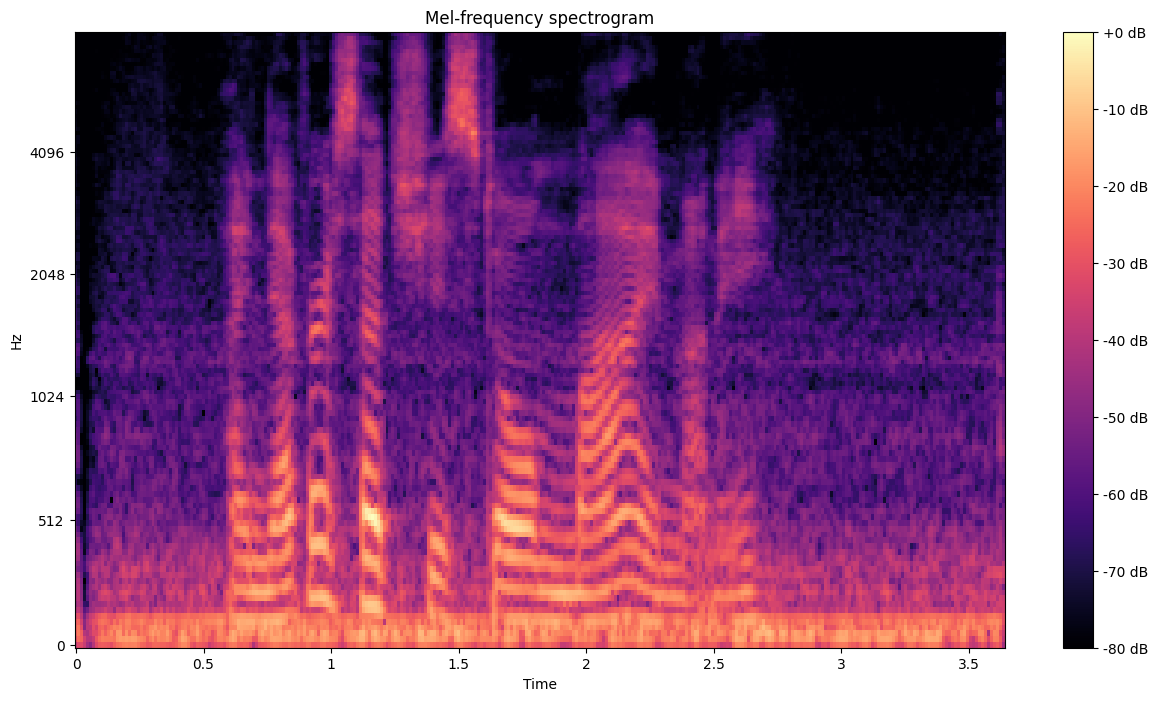

In [8]:

fig, ax = plt.subplots(figsize=[15, 8])
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr1,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [47]:
from inspect import signature

sig = signature(cdist)
len(sig.parameters)


2

In [13]:
# phi, x_tau, f_tau, g = gdtw.warp(mfcc1.T, mfcc2.T,     "Loss":   lambda x,y:      np.abs(x-y),
import gdtw

def cdist(x, y): return sp.spatial.distance.cosine(x,y)
# print(cdist(mfcc1[:, 10], mfcc2[:, 10]))
print(mfcc1[1, :].squeeze().shape, mfcc2[1,:].squeeze().shape)

params = {
    "lambda_cum": 0.05, 
    "lambda_inst": 0.05,
    "Loss": "cosine"
}

print('input shapes: ', mfcc2_delta.T.shape, mfcc1_delta.T.shape)
[phi, mfcc2_warped, cost, g] = gdtw.warp(mfcc2_delta.T, mfcc1_delta.T, params=params)
# out = gdtw.warp(mfcc1[1, :].squeeze(), mfcc2[1,:].squeeze(), params=params)
print(mfcc2_warped.shape)




(314,) (325,)
input shapes:  (325, 13) (314, 13)
Lat local version of gdtw2
(325, 13)


(128, 314)


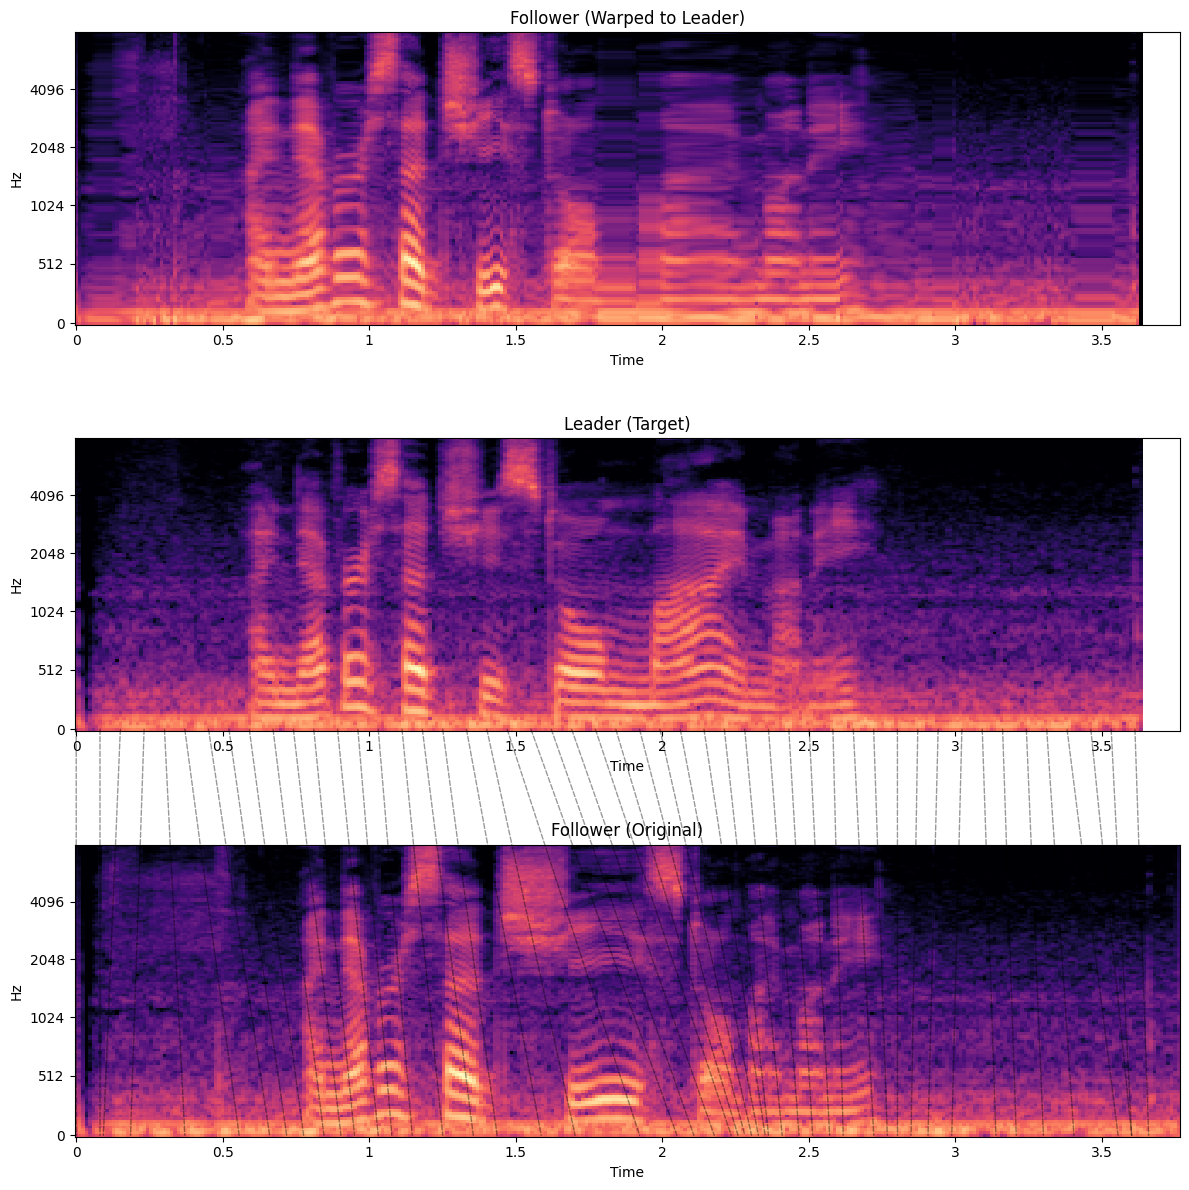

In [14]:

from scipy.interpolate import interp1d


# Step 1: Define the warping time points and apply phi
N = mfcc1.shape[1]
t = np.linspace(0, 1, N)                # normalized leader time
tau = np.clip(np.array([phi(ti) for ti in t]), 0, 1)  # normalized follower time

# Step 2: Convert tau to real time in seconds
tau_sec = tau * dur2

# Step 3: Interpolate follower spectrogram at warped times using linear interpolation
S2_interp_func = interp1d(S2_time, S2, axis=1, bounds_error=False, fill_value=0)
S2_warped = S2_interp_func(tau_sec)  # shape: (n_mels, N)
print(S2_warped.shape)

# Step 4: Plot
fig = plt.figure(figsize=(12, 12))

# Top: warped follower spectrogram
ax_top = fig.add_subplot(311)
librosa.display.specshow(librosa.power_to_db(S2_warped, ref=np.max),
                         sr=sr2, x_axis='time', y_axis='mel', fmax=8000, 
                         ax=ax_top)
ax_top.set_title("Follower (Warped to Leader)")
# ax_top.label_outer()

# Middle: leader spectrogram
ax_mid = fig.add_subplot(312, sharex=ax_top)
librosa.display.specshow(librosa.power_to_db(S1, ref=np.max),
                         sr=sr1, x_axis='time', y_axis='mel', fmax=8000, 
                         ax=ax_mid)
ax_mid.set_title("Leader (Target)")
# ax_mid.label_outer()

# Bottom: original follower spectrogram
ax_bot = fig.add_subplot(313, sharex=ax_top)
librosa.display.specshow(librosa.power_to_db(S2, ref=np.max),
                         sr=sr2, x_axis='time', y_axis='mel', fmax=8000, 
                         ax=ax_bot)
ax_bot.set_title("Follower (Original)")

# Step 5: Draw alignment lines (phi-based) between leader and original follower
n_lines = 50
for i in np.linspace(0, N - 3, n_lines).astype(int):
    t_sec = t[i] * dur1
    tau_sec_i = tau[i] * dur2

    xA = S1_time[np.searchsorted(S1_time, t_sec)]
    xB = S2_time[np.searchsorted(S2_time, tau_sec_i)]

    con = ConnectionPatch(
        xyA=(xA, 0), xyB=(xB, 0),
        coordsA='data', coordsB='data',
        axesA=ax_mid, axesB=ax_bot,
        color='k', linestyle='--', alpha=0.4
    )
    ax_bot.add_artist(con)

plt.tight_layout()
plt.show()

In [13]:
np.searchsorted(S1_time, t_sec)
t_sec

3.5497278911564627

# Reproduce their example

In [ ]:
import numpy as np
t = np.linspace(0,1,1000)
q = lambda t_: t_**2
x = lambda t_: np.sin(2*np.pi * 5 * t_)
y = lambda t_: x(q(t_))


import matplotlib.pyplot as plt
plt.plot(t, y(t), '-', color='C1', label='y(t)')
plt.plot(t, x(t), '-', color='C0', label='x(t)')
plt.legend()
plt.show()

In [ ]:
gdtw.warp(x, y, params={
    "lambda_cum": 0.001, 
    "lambda_inst": 0.001,
    "Loss":   lambda x,y:      np.abs(x-y),
    "R_cum":  lambda phi,t:    np.abs(phi-t),
    "R_inst": lambda grad_phi: np.abs(grad_phi-1)
})